   
<span style="color: White; font-size: 250%; font-weight: bold;">House Prices: Advanced Regression Techniques </span>


`Goal of the Project :`
   
<span style="color: White; font-size: 100%; ;">Predict the price of a house by its features. If you are a buyer or seller of the house but you don’t know the exact price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house. </span>



`About the Meta Data :`

### Content
#### Column Descriptions:

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Model 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor

from sklearn.svm import SVR

# impot pipeline
from sklearn.pipeline import Pipeline

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("train.csv")

In [4]:
print("shape of the train datase" ,train.shape)
train.head(3)

shape of the train datase (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test=pd.read_csv("test.csv")

In [6]:
print("shape of the test datase" ,test.shape)
test.head(3)

shape of the test datase (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
df = pd.concat((train, test))

In [8]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0


# Explore the dataset

In [9]:
df.shape

(2919, 81)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
# lets check the target variable "SalePrice"
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
# lets check the distribution of saleprice
# distpolt using pypolt
import plotly.express as px
fig = px.histogram(df, x="SalePrice", nbins=50)
fig.show()




In [13]:
# lets drop Id column because its of no use to us
df.drop("Id", axis=1, inplace=True)


In [14]:
# display the variables with more than 0 null values using forloop
null_cols = []
for col in df.columns:
    if df[col].isnull().sum() > 0 :
        print("Column",col, "has", df[col].isnull().sum(),"null values")    
        null_cols.append(col)

Column MSZoning has 4 null values
Column LotFrontage has 486 null values
Column Alley has 2721 null values
Column Utilities has 2 null values
Column Exterior1st has 1 null values
Column Exterior2nd has 1 null values
Column MasVnrType has 1766 null values
Column MasVnrArea has 23 null values
Column BsmtQual has 81 null values
Column BsmtCond has 82 null values
Column BsmtExposure has 82 null values
Column BsmtFinType1 has 79 null values
Column BsmtFinSF1 has 1 null values
Column BsmtFinType2 has 80 null values
Column BsmtFinSF2 has 1 null values
Column BsmtUnfSF has 1 null values
Column TotalBsmtSF has 1 null values
Column Electrical has 1 null values
Column BsmtFullBath has 2 null values
Column BsmtHalfBath has 2 null values
Column KitchenQual has 1 null values
Column Functional has 2 null values
Column FireplaceQu has 1420 null values
Column GarageType has 157 null values
Column GarageYrBlt has 159 null values
Column GarageFinish has 159 null values
Column GarageCars has 1 null values

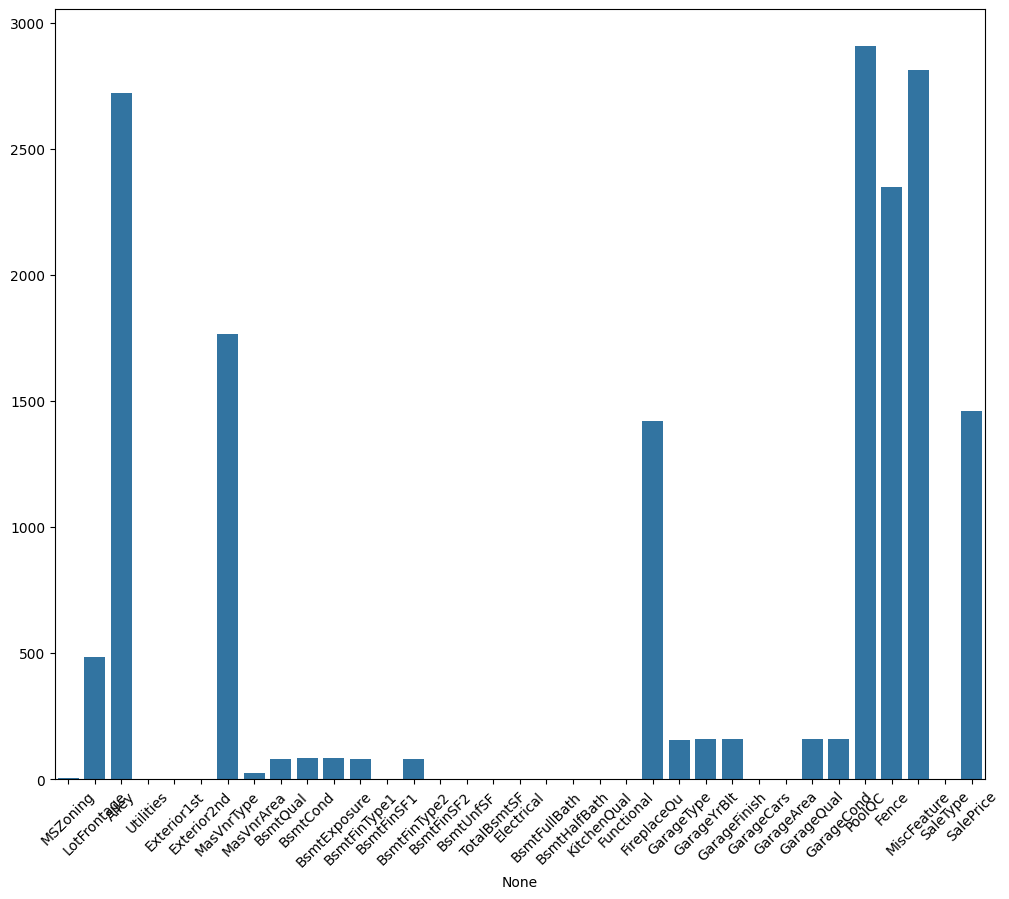

In [15]:
# lets visualize the null vaues 
# using bar plot 
# plt.figure(figsize=(12,10))
# sns.barplot(x=df[null_cols].isnull().sum().index, y=df[null_cols].isnull().sum().values)
# xticks(rotation=45)
# plt.show()
plt.figure(figsize=(12, 10))

# Create the barplot
sns.barplot(
    x=df[null_cols].isnull().sum().index,
    y=df[null_cols].isnull().sum().values
)

# Adjust the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [16]:
df.drop(['MSSubClass','YrSold','MoSold'],axis=1,inplace= True)

In [17]:
# plot Scatter plot usig plotly
import plotly.express as px
fig = px.scatter(df, x="LotArea", y="SalePrice")
fig.show()



In [18]:
# missimg value imputation
df.isnull().sum()



MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
                 ... 
MiscFeature      2814
MiscVal             0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 77, dtype: int64

In [19]:
# miissing value percentage
df.isnull().sum()/df.shape[0]*100

MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
                   ...    
MiscFeature      96.402878
MiscVal           0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 77, dtype: float64

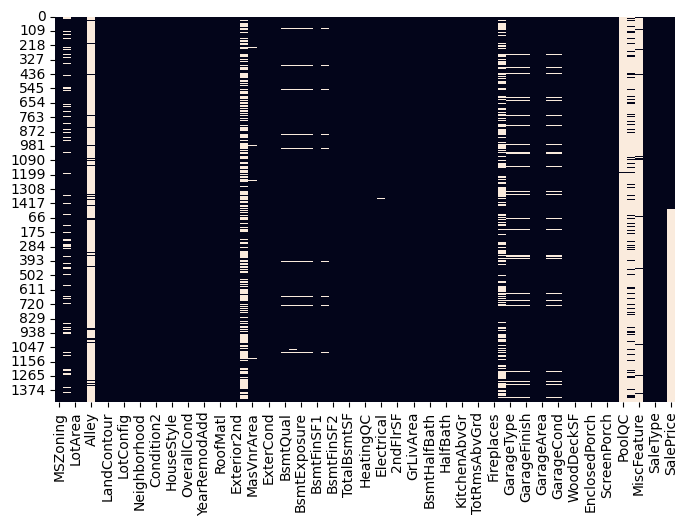

In [20]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [21]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [22]:
# Selecting only numerical columns with missing values
numerical_missing_columns = df.select_dtypes(include=['float', 'int']).columns[
    df.select_dtypes(include=['float', 'int']).isnull().any()
]

In [23]:
numerical_missing_columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [24]:
# Selecting only categorical columns with missing values
Cat_missing_columns = df.select_dtypes(include=['object']).columns[
    df.select_dtypes(include=['object']).isnull().any()
]

# Display the selected column names
print("Categorical columns with missing values:", Cat_missing_columns.tolist())

Categorical columns with missing values: ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [25]:
# Define bool_cols as columns with boolean data types
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Check if there are any boolean columns
if not bool_cols:
    print("No boolean columns found in the dataset.")
else:
    print("Boolean columns in the dataset:", bool_cols)


No boolean columns found in the dataset.


In [26]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
GarageCars         1
KitchenQual        1
GarageArea         1
SaleType           1
dtype: int64

In [27]:
# Drop duplicate columns if any
if df.columns.duplicated().any():
    df = df.loc[:, ~df.columns.duplicated()]

# Define the function for imputing categorical missing data
def impute_categorical_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]
    
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = label_encoder.fit_transform(X[col])
    
    rf_classifier = RandomForestClassifier(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    print(f"Imputation accuracy for {passed_col}: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    
    if not df_null.empty:
        X_null = df_null.drop(passed_col, axis=1)
        for col in X_null.columns:
            if X_null[col].dtype == 'object':
                X_null[col] = label_encoder.fit_transform(X_null[col])
        df_null[passed_col] = rf_classifier.predict(X_null)
    
    df_combined = pd.concat([df_not_null, df_null]).reset_index(drop=True)
    return df_combined[passed_col]

# Define the function for imputing continuous missing data
def impute_continuous_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]
    
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = label_encoder.fit_transform(X[col])
    
    rf_regressor = RandomForestRegressor(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    
    print(f"MAE for {passed_col}: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE for {passed_col}: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"R2 Score for {passed_col}: {r2_score(y_test, y_pred):.2f}")
    
    if not df_null.empty:
        X_null = df_null.drop(passed_col, axis=1)
        for col in X_null.columns:
            if X_null[col].dtype == 'object':
                X_null[col] = label_encoder.fit_transform(X_null[col])
        df_null[passed_col] = rf_regressor.predict(X_null)
    
    df_combined = pd.concat([df_not_null, df_null]).reset_index(drop=True)
    return df_combined[passed_col]


for col in missing_data_cols:
    print(f"Processing column: {col}")
    if col in Cat_missing_columns:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_missing_columns:
        df[col] = impute_continuous_missing_data(col)


Processing column: MSZoning
Imputation accuracy for MSZoning: 93.83%
Processing column: LotFrontage
MAE for LotFrontage: 8.91
RMSE for LotFrontage: 15.27
R2 Score for LotFrontage: 0.55
Processing column: Alley
Imputation accuracy for Alley: 80.00%
Processing column: Utilities
Imputation accuracy for Utilities: 100.00%
Processing column: Exterior1st
Imputation accuracy for Exterior1st: 83.73%
Processing column: Exterior2nd
Imputation accuracy for Exterior2nd: 64.21%
Processing column: MasVnrType
Imputation accuracy for MasVnrType: 88.31%
Processing column: MasVnrArea
MAE for MasVnrArea: 82.39
RMSE for MasVnrArea: 139.96
R2 Score for MasVnrArea: 0.34
Processing column: BsmtQual
Imputation accuracy for BsmtQual: 86.09%
Processing column: BsmtCond
Imputation accuracy for BsmtCond: 92.96%
Processing column: BsmtExposure
Imputation accuracy for BsmtExposure: 73.59%
Processing column: BsmtFinType1
Imputation accuracy for BsmtFinType1: 71.65%
Processing column: BsmtFinSF1
MAE for BsmtFinSF1: 4

In [28]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [29]:
df.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
                ..
MiscFeature      0
MiscVal          0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with Outliers</span>


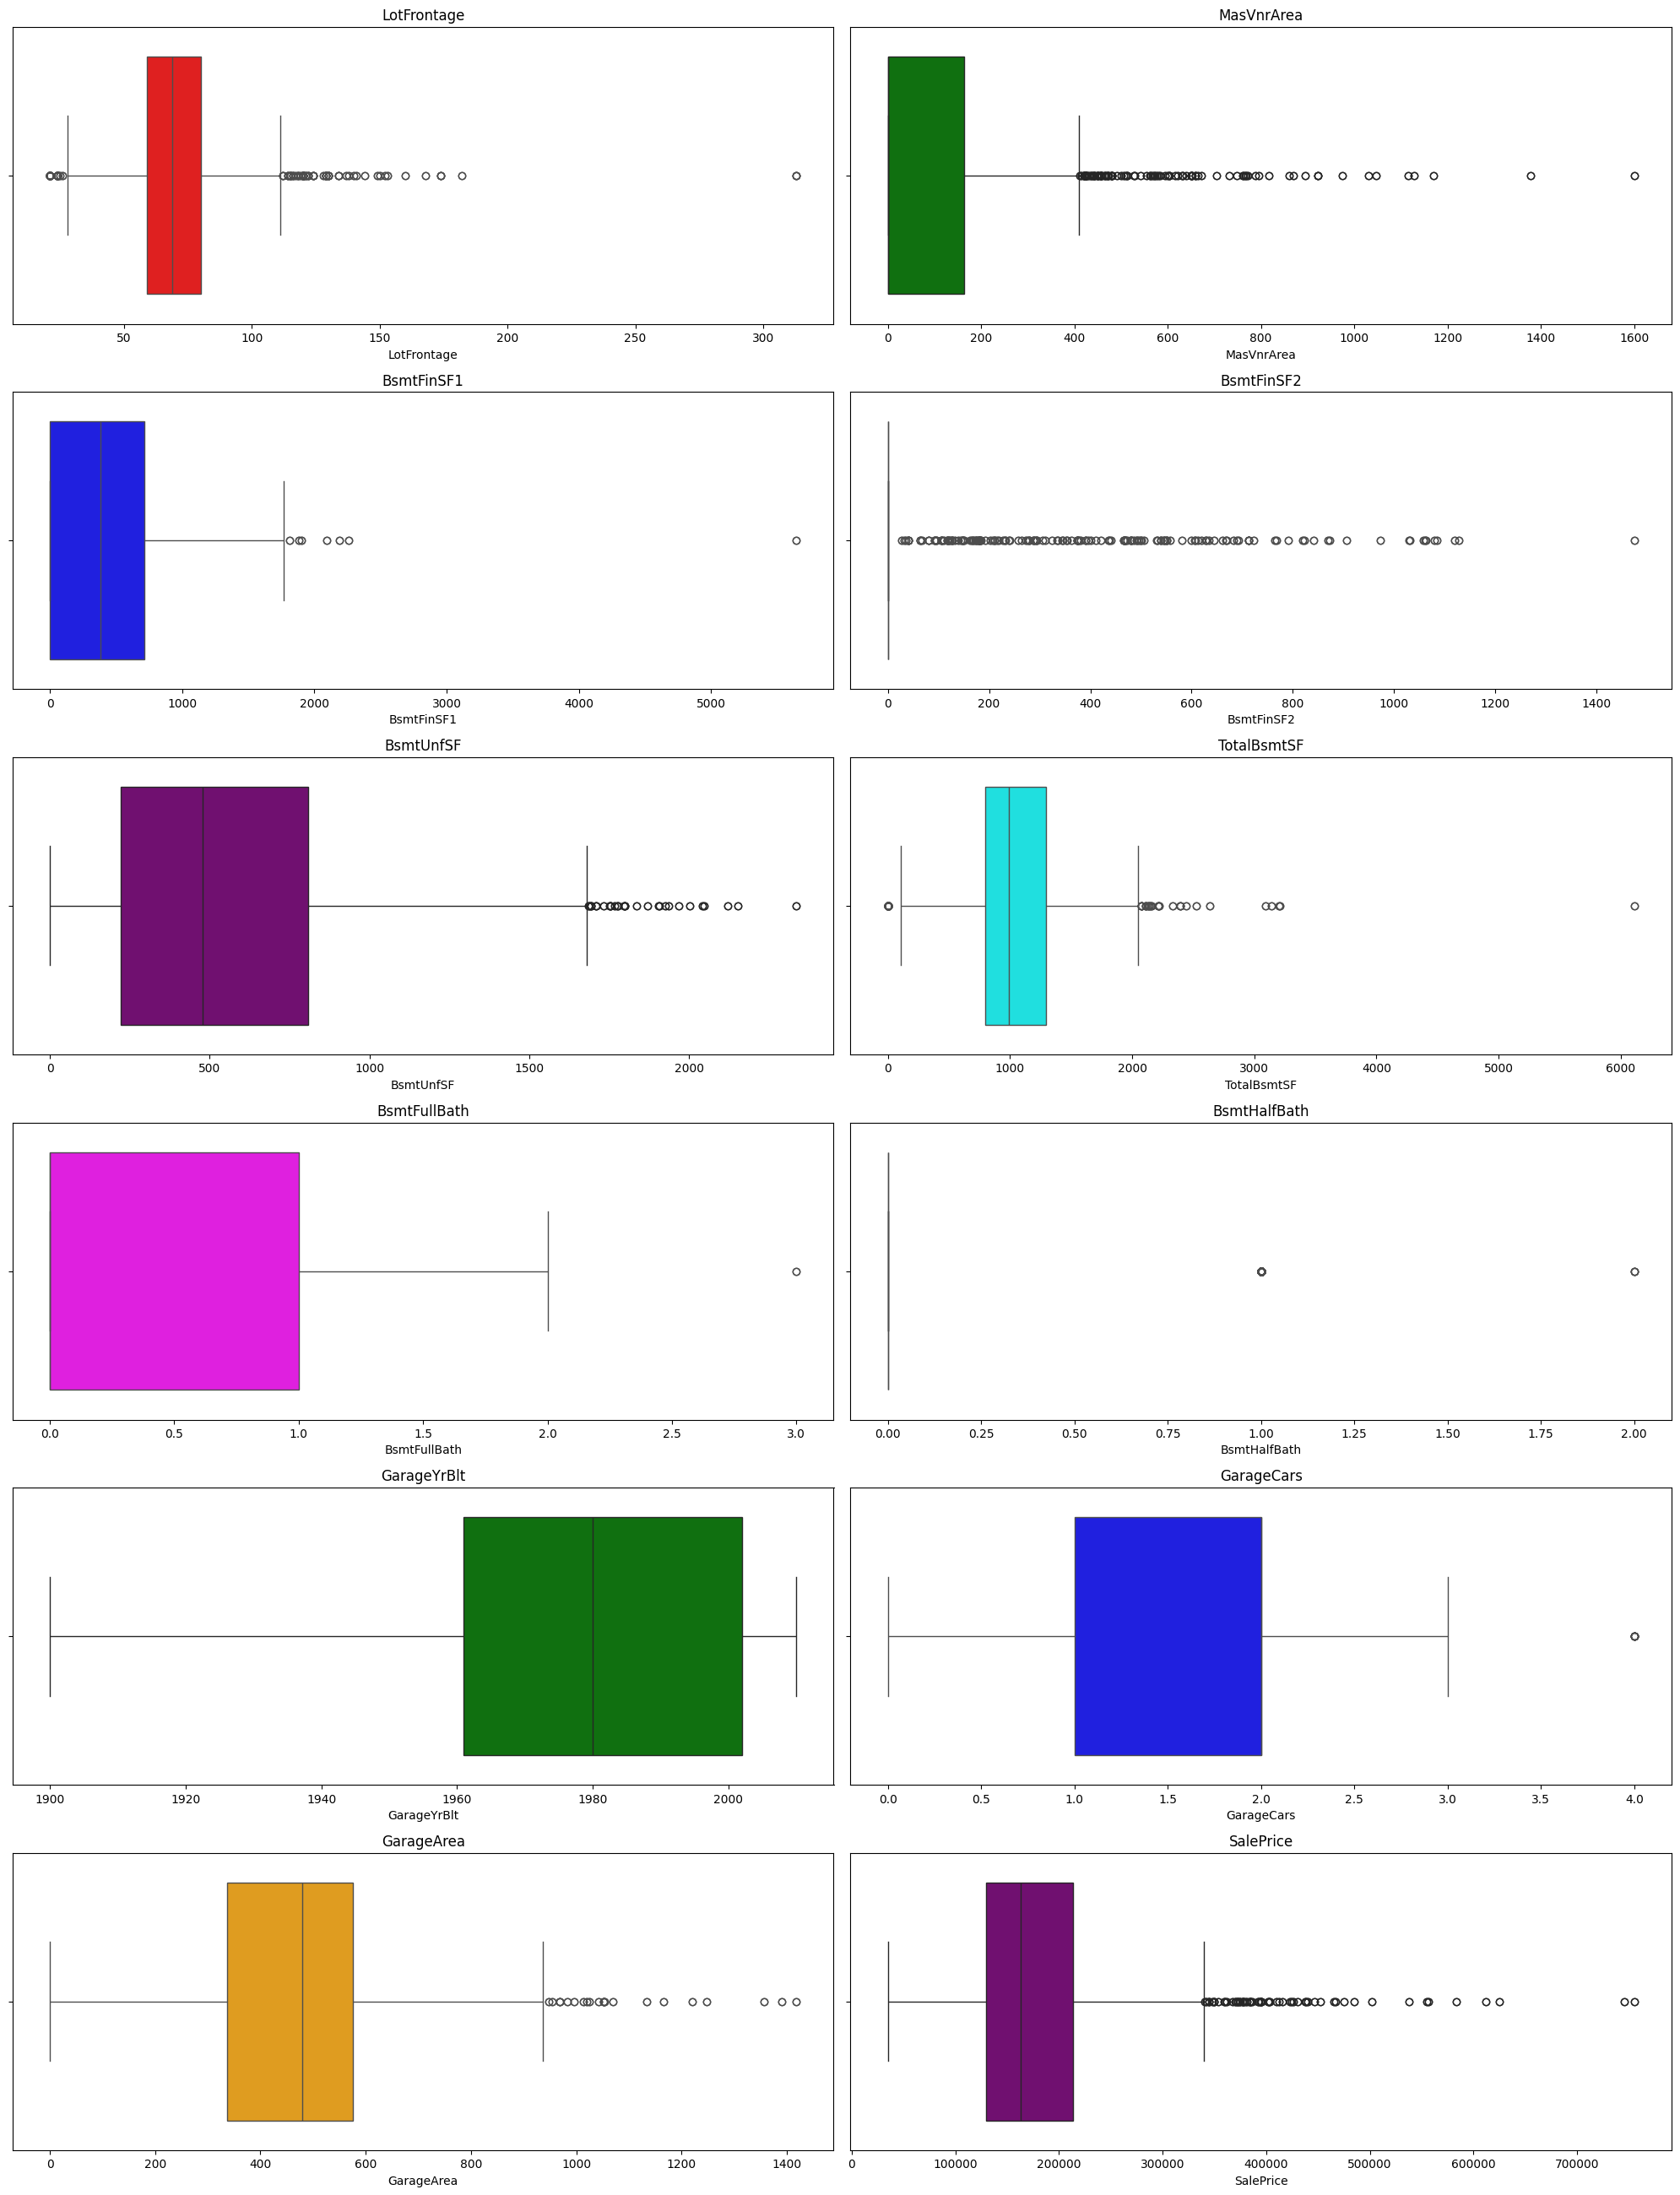

In [30]:
# create box plots for all numeric columns using for loop and subplot

plt.figure(figsize=(20, 30))

# Define colors and use itertools.cycle for dynamic cycling
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta'])

for i, col in enumerate(numerical_missing_columns):
    plt.subplot((len(numerical_missing_columns) // 2) + 1, 2, i + 1)  # Adjust subplot grid size dynamically
    sns.boxplot(x=df[col], color=next(colors))  # Automatically pick the next color
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [31]:
df["LotFrontage"].describe()

count    2919.000000
mean       69.719082
std        23.983356
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [32]:
df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [33]:
df["BsmtFinSF2"].describe()

count    2919.000000
mean       46.465913
std       161.256285
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

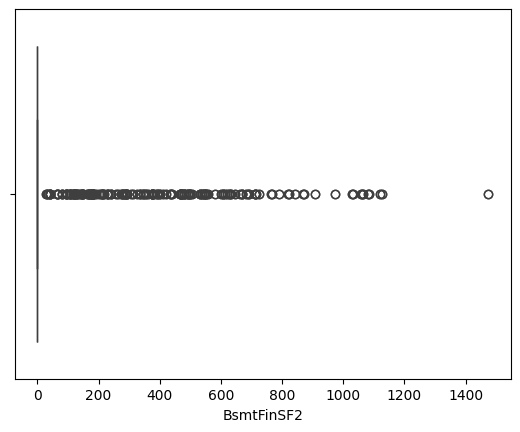

In [34]:
# plot the box plot col BsmtFinSF2
sns.boxplot(x=df["BsmtFinSF2"])
plt.xlabel("BsmtFinSF2")
plt.show()



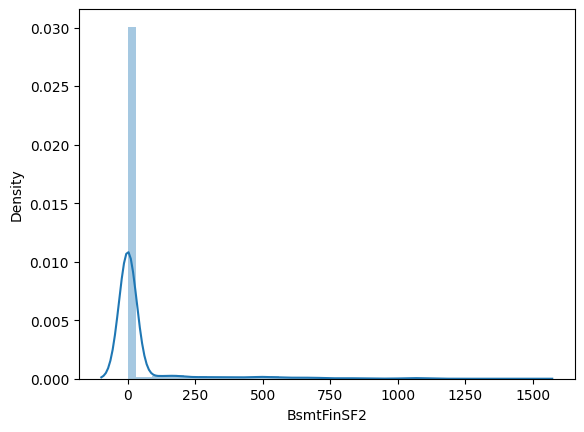

In [35]:
# plot dist plot col BsmtFinSF2 usong pyplot
sns.distplot(df["BsmtFinSF2"])
plt.xlabel("BsmtFinSF2")
plt.show()


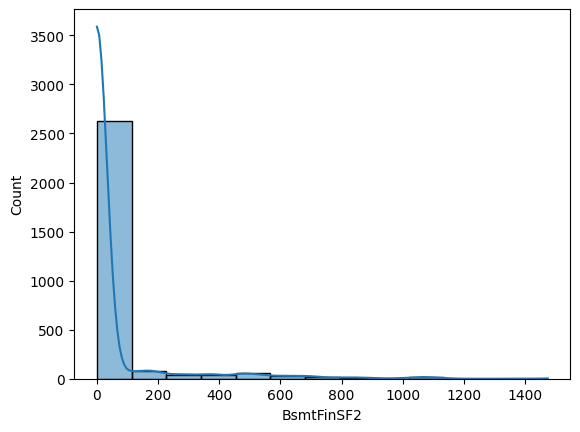

In [36]:
# draw a histogram to see the distribution of BsmtFinSF2  column
sns.histplot(df['BsmtFinSF2'], kde=True)
plt.xlabel("BsmtFinSF2")
plt.show()


Mean: 46.4659129838986
Median: 0.0
Mode: 0.0


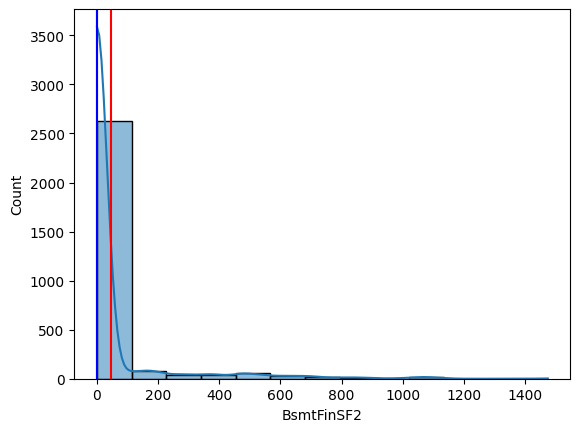

In [37]:
# plot the mean, median and mode of BsmtFinSF2 column using sns
sns.histplot(df['BsmtFinSF2'], kde=True)
plt.axvline(df['BsmtFinSF2'].mean(), color='red')
plt.axvline(df['BsmtFinSF2'].median(), color='green')
plt.axvline(df['BsmtFinSF2'].mode()[0], color='blue')

# print the value of mean, median and mode of BsmtFinSF2 column
print('Mean:', df['BsmtFinSF2'].mean())
print('Median:', df['BsmtFinSF2'].median())
print('Mode:', df['BsmtFinSF2'].mode()[0])

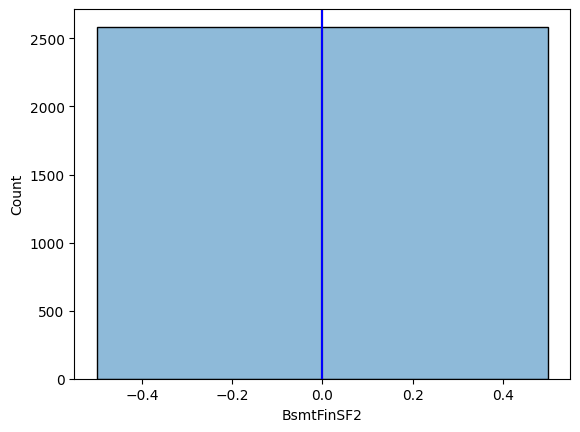

In [38]:
# Remove outlier using IQR
Q1 = df['BsmtFinSF2'].quantile(0.25)
Q3 = df['BsmtFinSF2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['BsmtFinSF2'] >= lower_bound) & (df['BsmtFinSF2'] <= upper_bound)]

# plot the mean, median and mode of BsmtFinSF2 column using sns
sns.histplot(df['BsmtFinSF2'], kde=True)
plt.axvline(df['BsmtFinSF2'].mean(), color='red')
plt.axvline(df['BsmtFinSF2'].median(), color='green')
plt.axvline(df['BsmtFinSF2'].mode()[0], color='blue')




In [39]:
# select the all categorical columns
categorical_missing_columns = df.select_dtypes(include=['object']).columns.tolist()

In [40]:
# Lable encoding using LabelEncoder of all the categorical columns
label_encoder = LabelEncoder()
for col in categorical_missing_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [41]:
# show the value of categorical columns
df[categorical_missing_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,0,2,2,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,1,1,2,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,2,0,2,8,4
3,3,1,0,0,3,0,0,0,6,2,...,5,2,4,4,2,0,2,2,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,2,0,2,8,4


In [42]:
# select the all numerical columns
numerical_missing_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_missing_columns

['MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '

In [43]:
# Scaling using StandardScaler of all the numerical columns
scaler = StandardScaler()
df[numerical_missing_columns] = scaler.fit_transform(df[numerical_missing_columns])

In [44]:
df[numerical_missing_columns].head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,-0.03269,-0.204280,-0.240992,0.059097,-1.294998,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.08523,0.323215,0.197950,0.320644
1,-0.03269,0.419266,-0.061961,0.059097,0.772202,0.740871,0.318539,0.0,-0.657236,-0.210001,...,-0.104529,-0.280275,-0.05787,-0.061260,-0.373842,0.075599,-0.08523,0.323215,0.197950,-0.011475
2,-0.03269,-0.079571,0.194910,0.059097,0.772202,-1.388687,0.318539,0.0,0.589271,-0.210001,...,-0.104529,-0.280275,-0.05787,0.941390,-1.477445,0.075599,-0.08523,0.323215,0.197950,0.505154
3,-0.03269,-0.412129,-0.069745,0.059097,-1.294998,-1.388687,0.318539,0.0,-1.903743,-0.210001,...,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.08523,0.323215,-3.531725,-0.521954
4,-0.03269,0.585545,0.663505,0.059097,0.772202,-1.388687,0.318539,0.0,-0.657236,-0.210001,...,-0.104529,-0.280275,-0.05787,0.941390,-1.477445,0.075599,-0.08523,0.323215,0.197950,0.831123


In [45]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,-0.03269,-0.204280,-0.240992,0.059097,-1.294998,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.08523,0.323215,0.197950,0.320644
1,-0.03269,0.419266,-0.061961,0.059097,0.772202,0.740871,0.318539,0.0,-0.657236,-0.210001,...,-0.104529,-0.280275,-0.05787,-0.061260,-0.373842,0.075599,-0.08523,0.323215,0.197950,-0.011475
2,-0.03269,-0.079571,0.194910,0.059097,0.772202,-1.388687,0.318539,0.0,0.589271,-0.210001,...,-0.104529,-0.280275,-0.05787,0.941390,-1.477445,0.075599,-0.08523,0.323215,0.197950,0.505154
3,-0.03269,-0.412129,-0.069745,0.059097,-1.294998,-1.388687,0.318539,0.0,-1.903743,-0.210001,...,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.08523,0.323215,-3.531725,-0.521954
4,-0.03269,0.585545,0.663505,0.059097,0.772202,-1.388687,0.318539,0.0,-0.657236,-0.210001,...,-0.104529,-0.280275,-0.05787,0.941390,-1.477445,0.075599,-0.08523,0.323215,0.197950,0.831123


In [46]:
# split the data into X and Y
X = df.drop("SalePrice", axis=1)
Y = df["SalePrice"]


In [47]:
X

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,-0.032690,-0.204280,-0.240992,0.059097,-1.294998,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.085230,0.323215,0.197950
1,-0.032690,0.419266,-0.061961,0.059097,0.772202,0.740871,0.318539,0.0,-0.657236,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,-0.061260,-0.373842,0.075599,-0.085230,0.323215,0.197950
2,-0.032690,-0.079571,0.194910,0.059097,0.772202,-1.388687,0.318539,0.0,0.589271,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,0.941390,-1.477445,0.075599,-0.085230,0.323215,0.197950
3,-0.032690,-0.412129,-0.069745,0.059097,-1.294998,-1.388687,0.318539,0.0,-1.903743,-0.210001,...,3.955343,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.085230,0.323215,-3.531725
4,-0.032690,0.585545,0.663505,0.059097,0.772202,-1.388687,0.318539,0.0,-0.657236,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,0.941390,-1.477445,0.075599,-0.085230,0.323215,0.197950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1.476893,0.627115,-1.317826,0.059097,0.772202,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,-1.063911,-1.477445,0.075599,-0.085230,0.323215,-3.531725
1453,-0.032690,-0.079571,-1.318916,0.059097,-1.294998,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,-1.063911,-1.477445,0.075599,-0.085230,0.323215,0.197950
1454,-3.051856,0.834963,-1.255088,0.059097,0.772202,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,-1.063911,0.729761,0.075599,-0.085230,0.323215,0.197950
1455,-0.032690,0.918103,-1.261626,0.059097,0.772202,0.740871,0.318539,0.0,0.589271,-0.210001,...,-0.354430,-0.104529,-0.280275,-0.05787,-1.063911,-1.477445,0.075599,-0.085230,0.323215,-3.531725


In [48]:
Y

0       0.320644
1      -0.011475
2       0.505154
3      -0.521954
4       0.831123
          ...   
1452   -0.460450
1453   -1.204642
1454    0.031578
1455   -0.091429
1457    1.034084
Name: SalePrice, Length: 2586, dtype: float64

<span style="color: yellow; font-size: 350%; font-weight: bold;">Model Building</span>


In [49]:


# Create a list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('XGBoost', XGBRegressor())
]

best_model = None
best_accuracy = 0.0

# Evaluate each model
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, Y, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X, Y)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X)
    
    # Calculate accuracy score (use a suitable metric, e.g., R^2 for regression)
    accuracy = model.score(X, Y)  # Using R^2 score for regression
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# Print the best model and its accuracy
print("Best Accuracy:", best_accuracy)


Model: Linear Regression
Cross-validation Accuracy: 0.6452026060365637
Test Accuracy: 0.6893014378199596

Model: Lasso Regression
Cross-validation Accuracy: -0.0014377828662986759
Test Accuracy: 0.0

Model: Ridge Regression
Cross-validation Accuracy: 0.6451148941330953
Test Accuracy: 0.6892972872375421

Model: Decision Tree
Cross-validation Accuracy: 0.6937364695378914
Test Accuracy: 1.0

Model: Random Forest
Cross-validation Accuracy: 0.8200179856970682
Test Accuracy: 0.9762144383162733

Model: SVR
Cross-validation Accuracy: 0.6520442905443198
Test Accuracy: 0.850153739347041

Model: XGBoost
Cross-validation Accuracy: 0.8417543033803806
Test Accuracy: 0.997894457253854

Best Model: Pipeline(steps=[('model', DecisionTreeRegressor())])
Best Accuracy: 1.0


In [52]:
# report the best model
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: Pipeline(steps=[('model', DecisionTreeRegressor())])
Best Accuracy: 1.0


In [56]:
# plot the best model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model.predict(X)
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.6472555502615434e-35
R-squared: 1.0


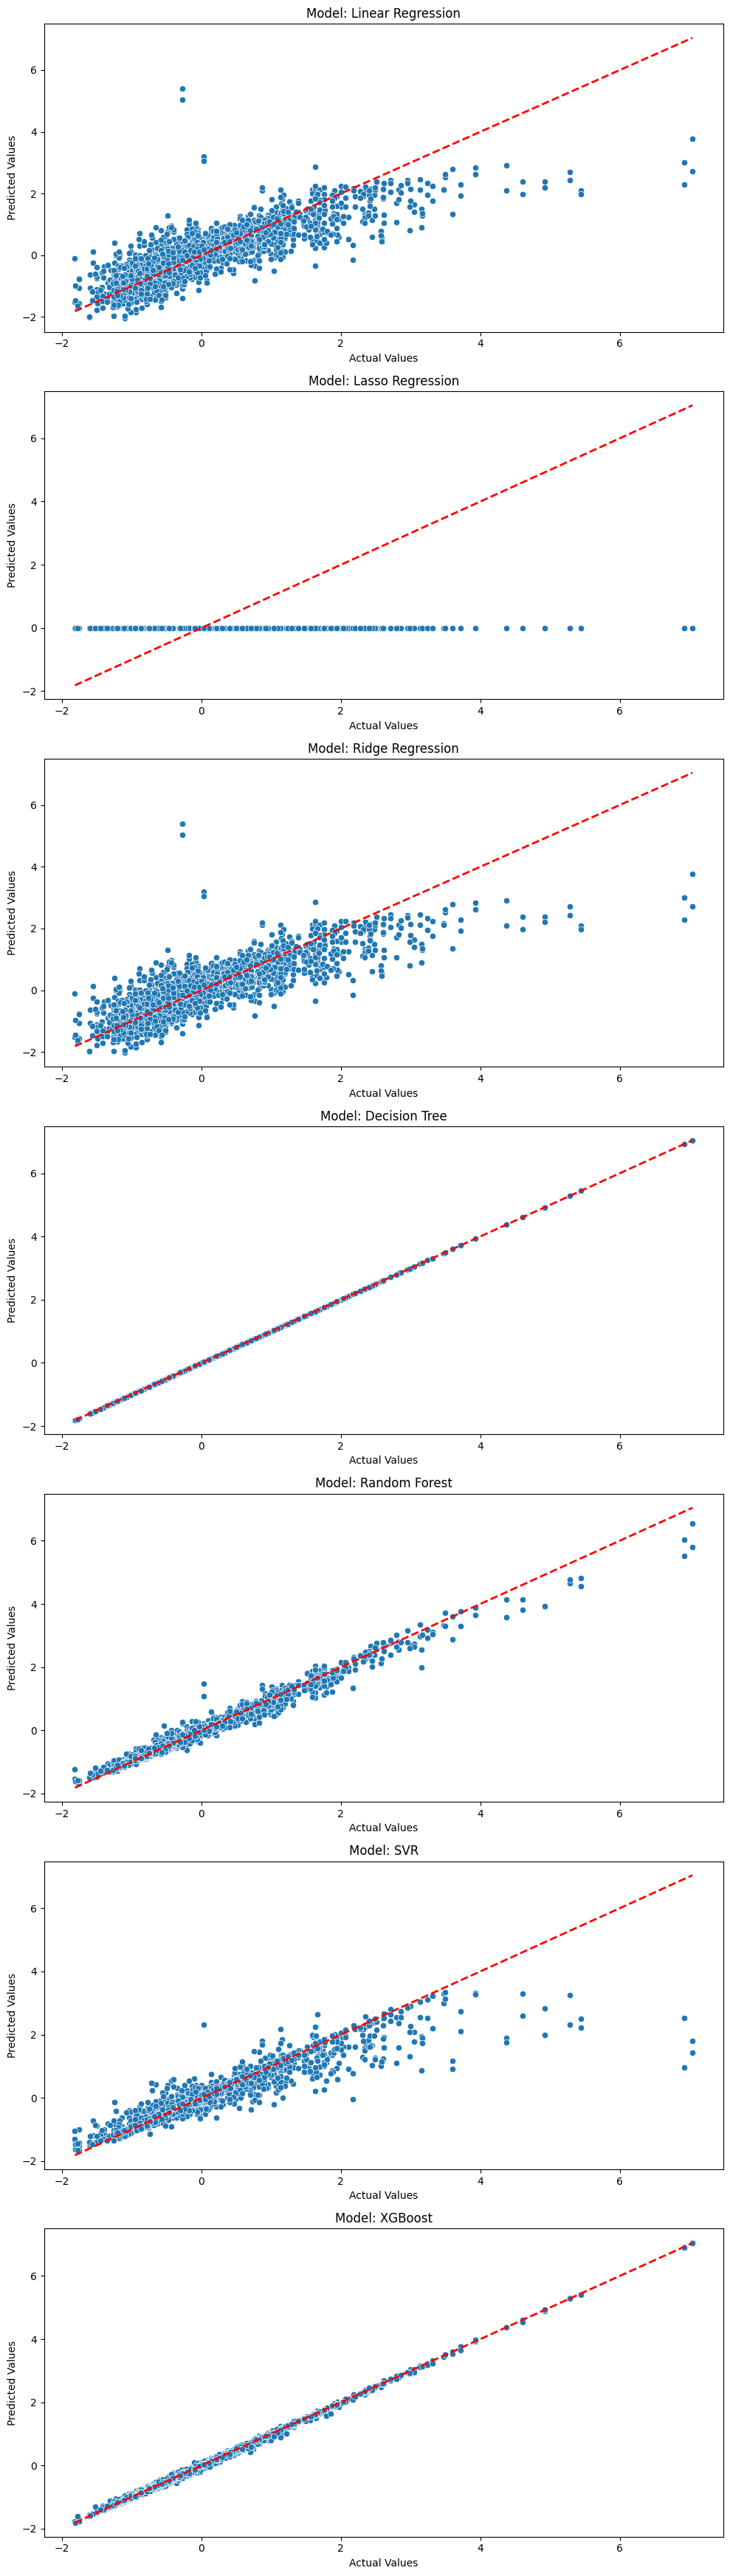

In [57]:
# plot the best model
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each model
fig, axs = plt.subplots(len(models), 1, figsize=(10, 5*len(models)))

for i, (name, model) in enumerate(models):
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X, Y)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X)
    
    # Plot actual vs predicted values
    sns.scatterplot(x=Y, y=y_pred, ax=axs[i])
    axs[i].plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', linewidth=2)  # Ideal line
    axs[i].set_title(f'Model: {name}')
    axs[i].set_xlabel('Actual Values')
    axs[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [55]:
# Save the model
import joblib
joblib.dump(best_model, 'house_price_prediction_model.joblib')

['house_price_prediction_model.joblib']